In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv("C:\Patient dataset-clustering\patient_dataset.csv")
df

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,Urban,Smoker
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,Urban,Unknown
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,Rural,Non-Smoker
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,Rural,Smoker
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,Rural,Smoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,76,1.0,1,117,247,88,1,104.0,22.0,179.0,42.427361,2.017600,1,0,Rural,Non-Smoker
5996,51,1.0,2,173,297,81,0,208.0,74.0,82.0,24.093549,1.276717,0,1,Urban,Non-Smoker
5997,70,0.0,2,120,234,111,0,139.0,45.0,86.0,40.483956,0.646022,0,1,Urban,Non-Smoker
5998,78,0.0,2,131,189,133,1,196.0,83.0,150.0,24.987071,0.719095,1,0,Urban,Non-Smoker


In [50]:
df.isnull().sum()

age                    0
gender               472
chest_pain_type        0
blood_pressure         0
cholesterol            0
max_heart_rate         0
exercise_angina        0
plasma_glucose       609
skin_thickness       614
insulin              568
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
residence_type       455
smoking_status         0
dtype: int64

In [51]:
numeric_cols = ["plasma_glucose", "skin_thickness", "insulin"]
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical columns → mode
categorical_cols = ["gender", "residence_type"]
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
df    

C:\Users\Sakthi\AppData\Local\Temp\ipykernel_24108\2461096351.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Sakthi\AppData\Local\Temp\ipykernel_24108\2461096351.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,Urban,Smoker
1,29,0.0,4,132,187,147,0,202.0,42.0,129.0,25.588346,0.283986,1,1,Urban,Unknown
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,Rural,Non-Smoker
3,73,0.0,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,Rural,Smoker
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,Rural,Smoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,76,1.0,1,117,247,88,1,104.0,22.0,179.0,42.427361,2.017600,1,0,Rural,Non-Smoker
5996,51,1.0,2,173,297,81,0,208.0,74.0,82.0,24.093549,1.276717,0,1,Urban,Non-Smoker
5997,70,0.0,2,120,234,111,0,139.0,45.0,86.0,40.483956,0.646022,0,1,Urban,Non-Smoker
5998,78,0.0,2,131,189,133,1,196.0,83.0,150.0,24.987071,0.719095,1,0,Urban,Non-Smoker


In [52]:
df.isnull().sum()

age                  0
gender               0
chest_pain_type      0
blood_pressure       0
cholesterol          0
max_heart_rate       0
exercise_angina      0
plasma_glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
residence_type       0
smoking_status       0
dtype: int64

In [53]:
df.duplicated().sum()

np.int64(0)

In [58]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = encoder.fit_transform(df[col])

Skewness of each column:
age                  0.030718
gender               0.166616
chest_pain_type     -0.020425
blood_pressure       0.089403
cholesterol          0.005312
max_heart_rate       0.007490
exercise_angina     -0.012670
plasma_glucose      -0.048352
skin_thickness      -0.011028
insulin              0.031902
bmi                  0.003675
diabetes_pedigree   -0.001205
hypertension        -0.005335
heart_disease        0.007335
residence_type      -0.155843
smoking_status       0.492976
dtype: float64


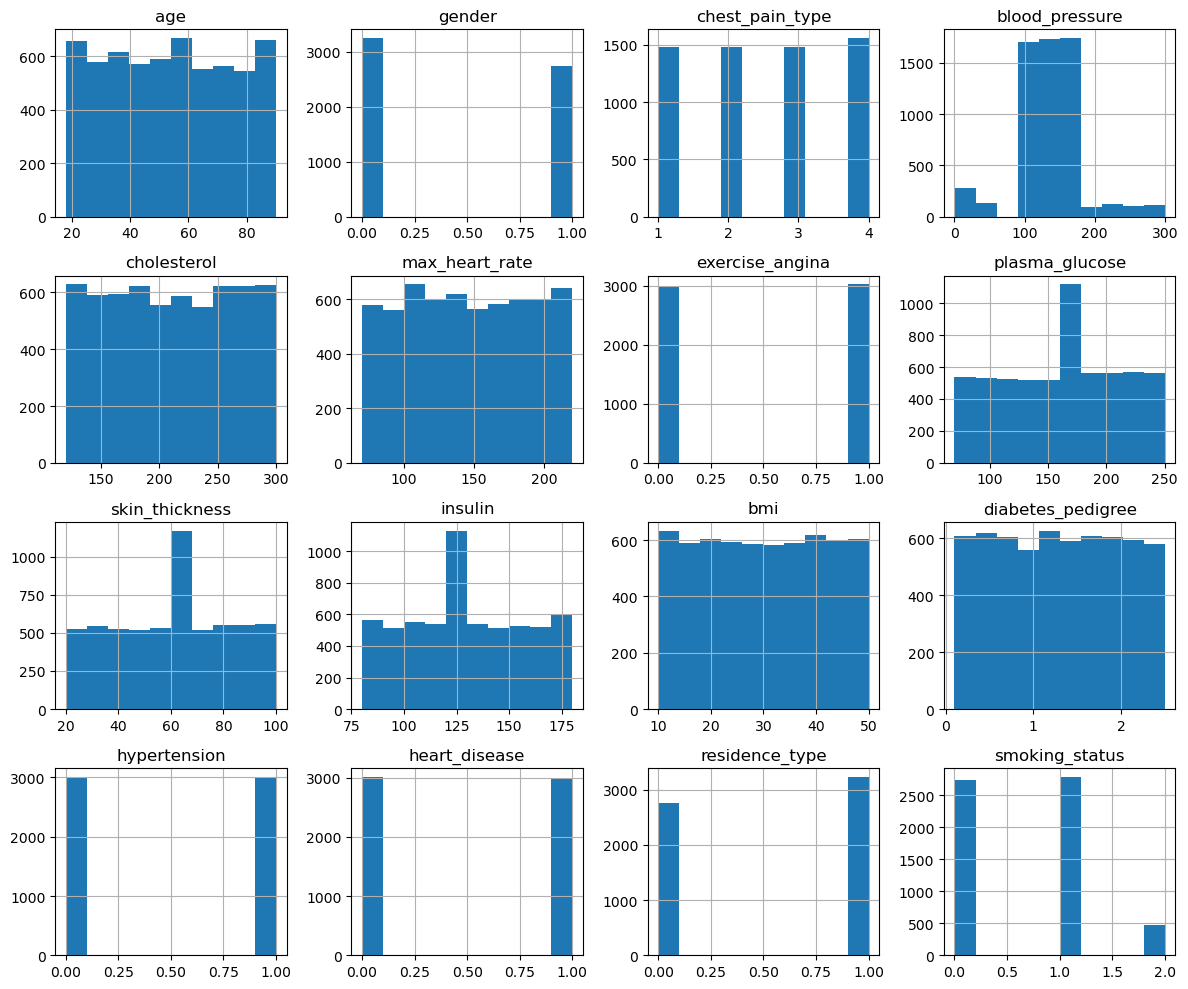

In [77]:
skewness = df.skew()
print("Skewness of each column:")
print(skewness)

df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [63]:
scaler=StandardScaler()
x=scaler.fit_transform(df)

c:\Users\Sakthi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Sakthi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Sakthi\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sakthi\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^

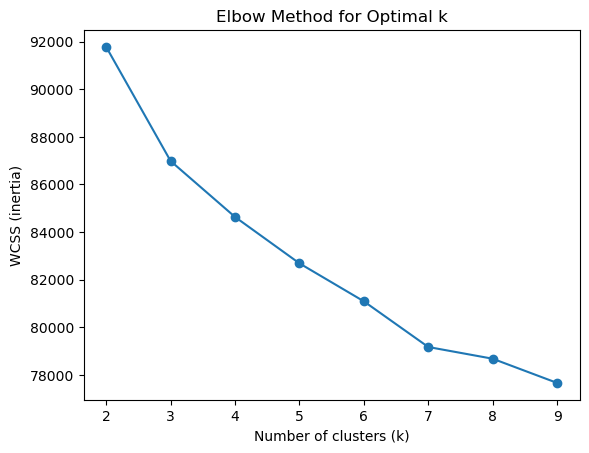

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score 
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.decomposition import PCA
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [65]:
kmeans=KMeans(n_clusters=3,random_state=42)
res=[]
y_cluster=kmeans.fit_predict(x)
kmeanssilhouette = silhouette_score(x, y_cluster)
kmeansdb_index = davies_bouldin_score(x, y_cluster)
kmeans_ch = calinski_harabasz_score(x, y_cluster)
res.append([kmeanssilhouette,kmeansdb_index,kmeans_ch,kmeans.inertia_])
print("Silhouette Score:", kmeanssilhouette)
print("Davies-Bouldin Index:", kmeansdb_index)
print("calinski_harabasz_score:",kmeans_ch)

Silhouette Score: 0.05194831380566494
Davies-Bouldin Index: 3.6119950061246926
calinski_harabasz_score: 310.78426172955653


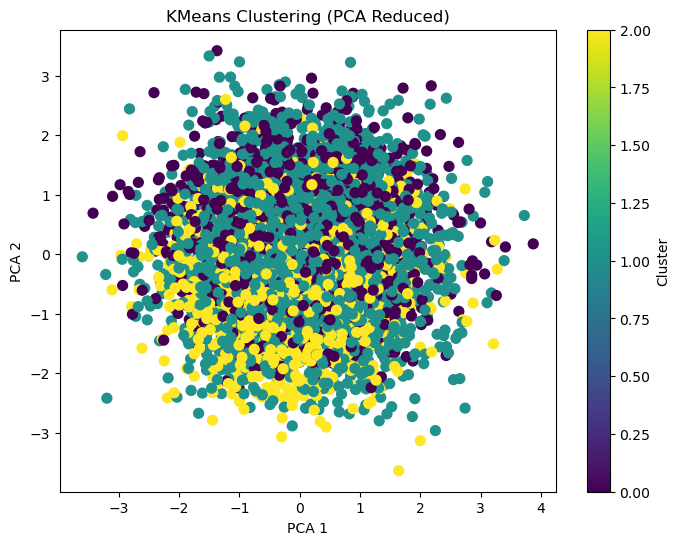

In [66]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],c=y_cluster, cmap="viridis", s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Clustering (PCA Reduced)")
plt.colorbar(label="Cluster")
plt.show()

<Figure size 800x500 with 0 Axes>

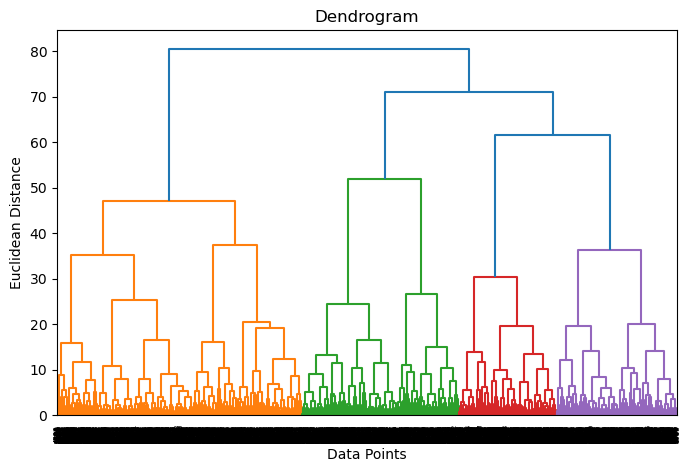

In [67]:
plt.figure(figsize=(8, 5))
dendrogram =plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show() 

Silhouette Score: 0.028186180833065608
Davies-Bouldin Index: 4.6089039938039305
calinski_harabasz_score: 191.9863647173254


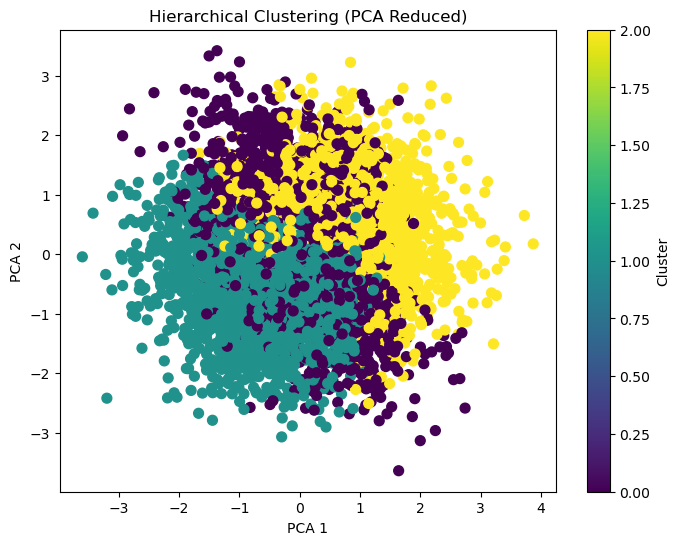

In [68]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(X_pca)
hcsilhouette = silhouette_score(x, y_hc)
hcdb_index = davies_bouldin_score(x, y_hc)
hc_ch = calinski_harabasz_score(x, y_hc)
res.append([hcsilhouette,hcdb_index,hc_ch,np.nan])
print("Silhouette Score:", hcsilhouette)
print("Davies-Bouldin Index:", hcdb_index)
print("calinski_harabasz_score:",hc_ch)
# PCA 2D plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_hc, cmap="viridis", s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Hierarchical Clustering (PCA Reduced)")
plt.colorbar(label="Cluster")
plt.show()

Silhouette Score: 0.0320482173742545
Davies-Bouldin Index: 7.801266508658265
calinski_harabasz_score: 1.822679816265541


C:\Users\Sakthi\AppData\Local\Temp\ipykernel_24108\1352545257.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


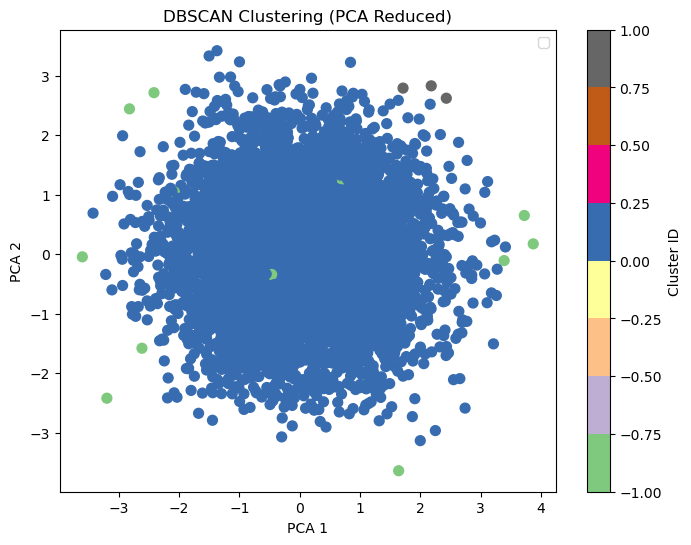

In [69]:
dbscan = DBSCAN(eps=0.7, min_samples=3)
y_db = dbscan.fit_predict(X_pca)
silhouette = silhouette_score(x, y_db)
db_index = davies_bouldin_score(x, y_db)
db_ch = calinski_harabasz_score(x, y_db)
res.append([silhouette,db_index,db_ch,np.nan])
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", db_index)
print("calinski_harabasz_score:",db_ch)
# PCA 2D plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_db, cmap="Accent", s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.title("DBSCAN Clustering (PCA Reduced)")
plt.colorbar(label="Cluster ID")
plt.show()

In [81]:
res_cleaned = [row[:3] for row in res]   # keep only first 3 values
dfs = pd.DataFrame(
    res_cleaned,
    columns=["silhouette_score", "davis_bouldin_score", "calinski_harabasz_score"],
    index=["KMeans", "Hierarchical", "DBSCAN"]
)
print(dfs)


              silhouette_score  davis_bouldin_score  calinski_harabasz_score
KMeans                0.051948             3.611995               310.784262
Hierarchical          0.028186             4.608904               191.986365
DBSCAN                0.032048             7.801267                 1.822680
